In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path1 = Path("/Users/zainabnazari/mfuzz/data")

In [3]:
data_m = pd.read_excel(path1/"merged_noFC_miRNA.xlsx")

In [4]:
data_m

,miRNA_ID,FC_2_6,FC_6_12
0,mmu-miR-10b-5p,-1.954425,-1.078278
1,mmu-miR-1264-3p,-1.435970,-2.553652
2,mmu-miR-448-3p,-1.389448,-1.881322
3,mmu-miR-1298-3p,-1.344444,-1.186487
4,mmu-miR-1298-5p,-1.332344,-2.108564
5,mmu-miR-1264-5p,-1.331243,-1.037213
6,mmu-miR-666-5p,-1.119025,0.845991
7,mmu-miR-467a-5p,-0.964038,-0.907717
8,mmu-miR-34c-5p,-0.950259,-0.683349
9,mmu-miR-100-5p,-0.825334,-0.897539


In [5]:
data_m['t0'] = 0

In [6]:
data_m = data_m[['miRNA_ID', 't0', 'FC_2_6', 'FC_6_12']]

In [7]:
data_m["FC_2_6"].max()

1.00383089317188

In [8]:
data_m["FC_2_6"].min()

-1.95442495273275

In [9]:
data_m["FC_6_12"].max()

0.845991344741999

In [10]:
data_m["FC_6_12"].min()

-2.55365160872395

# Classifications

/Users/zainabnazari/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


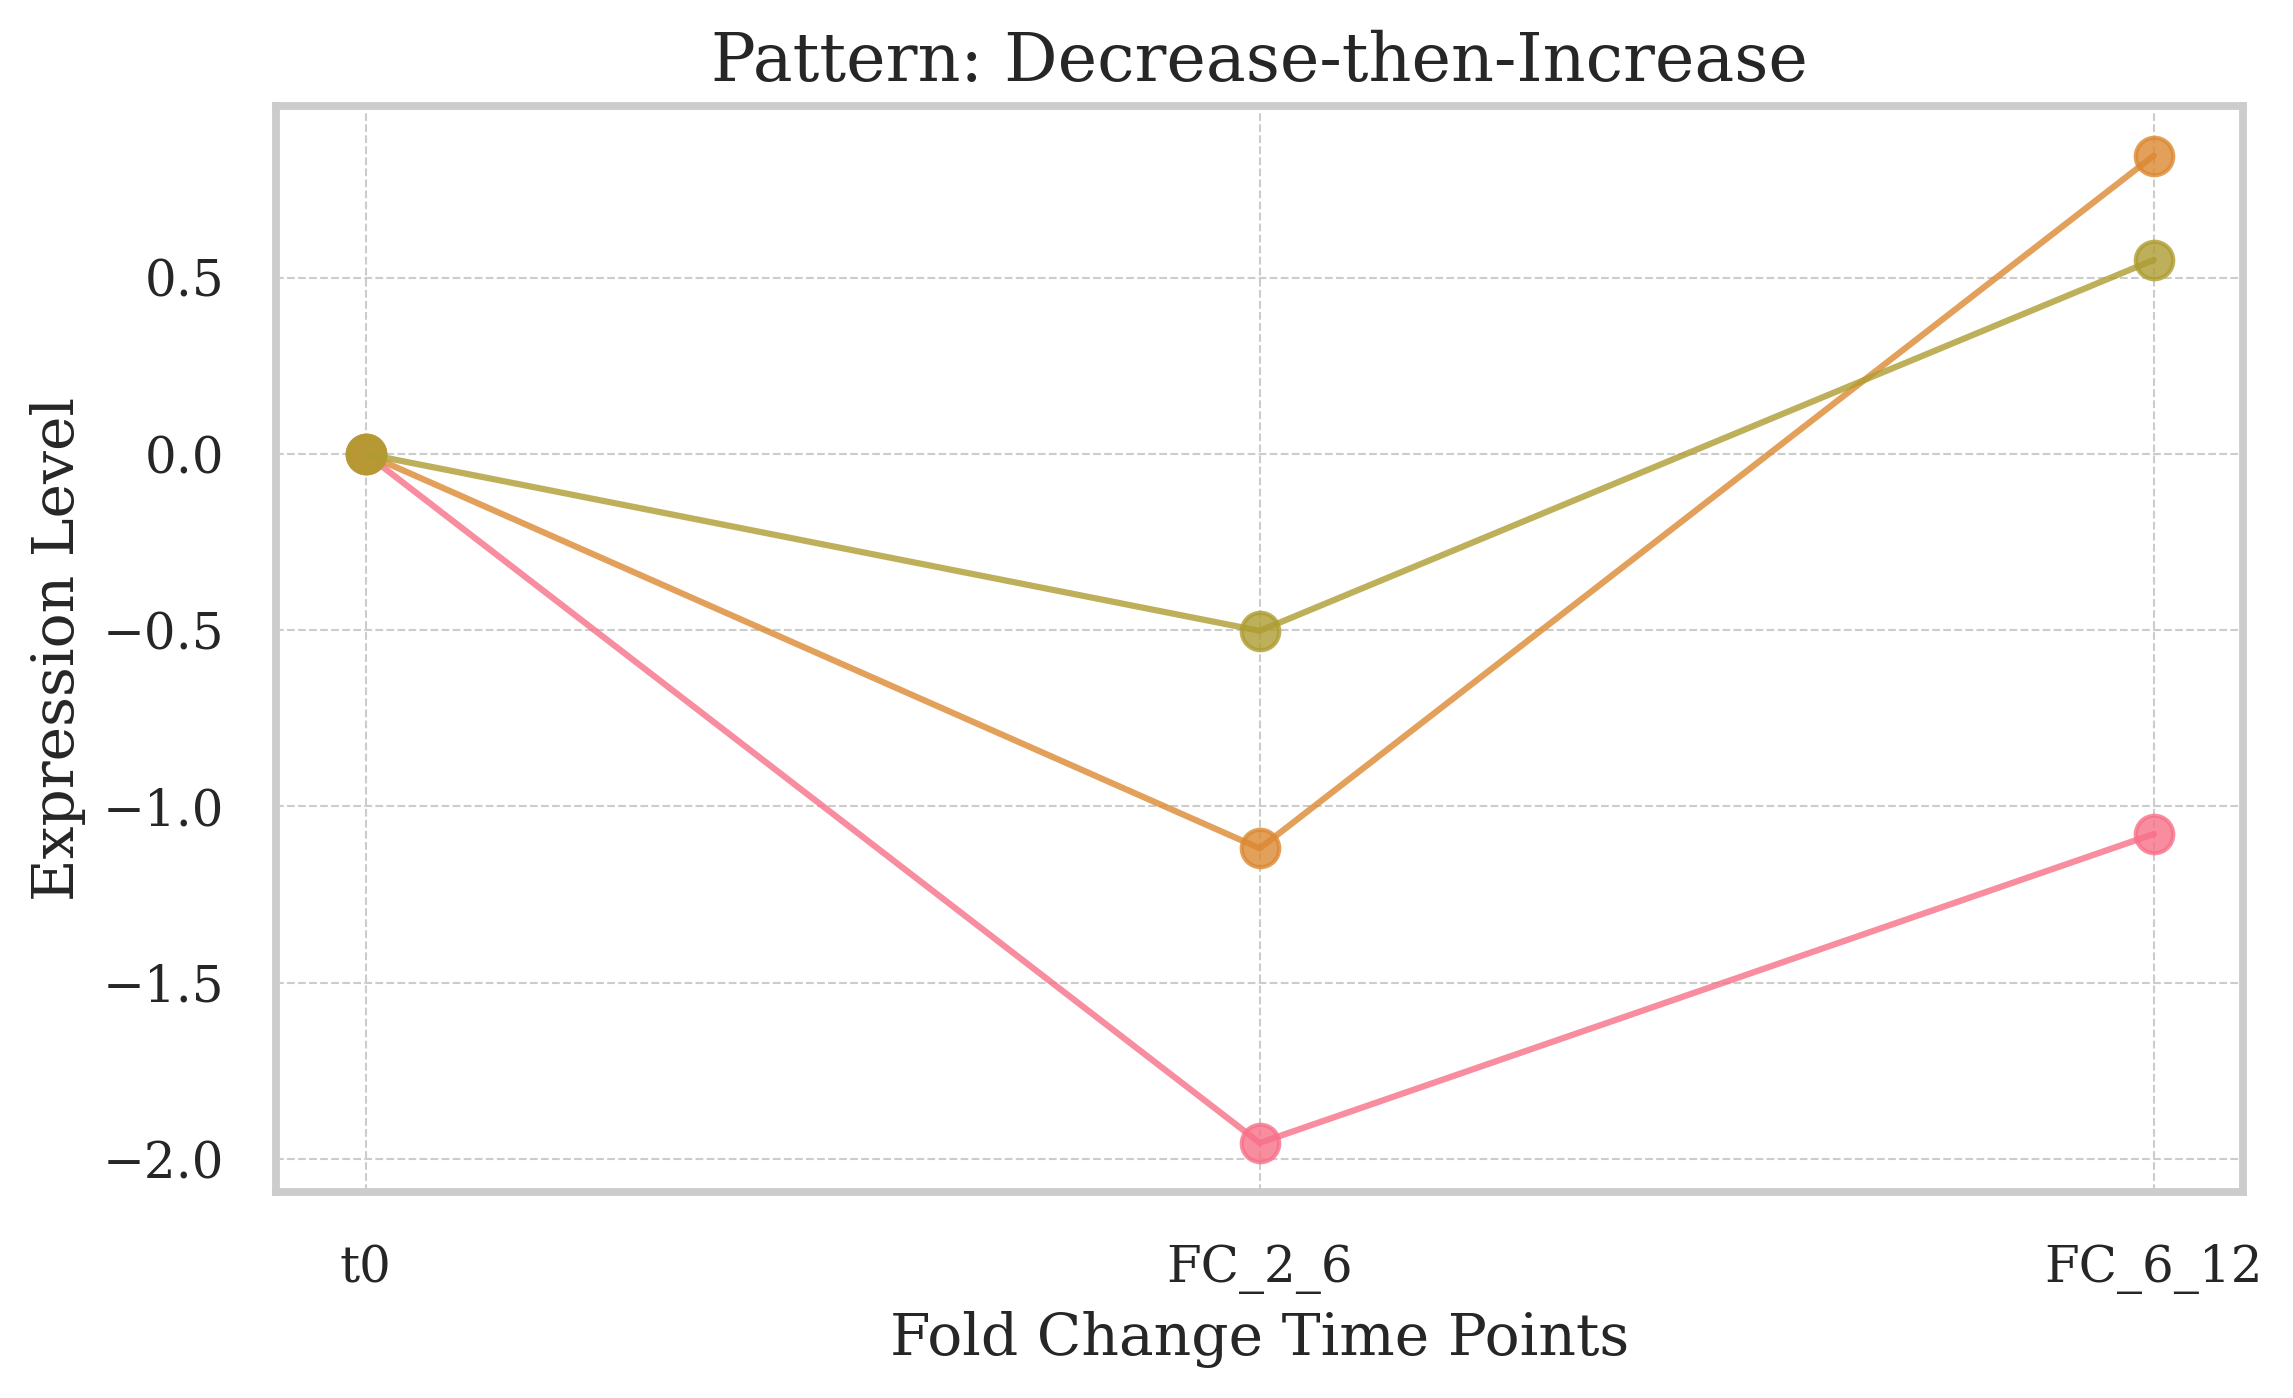

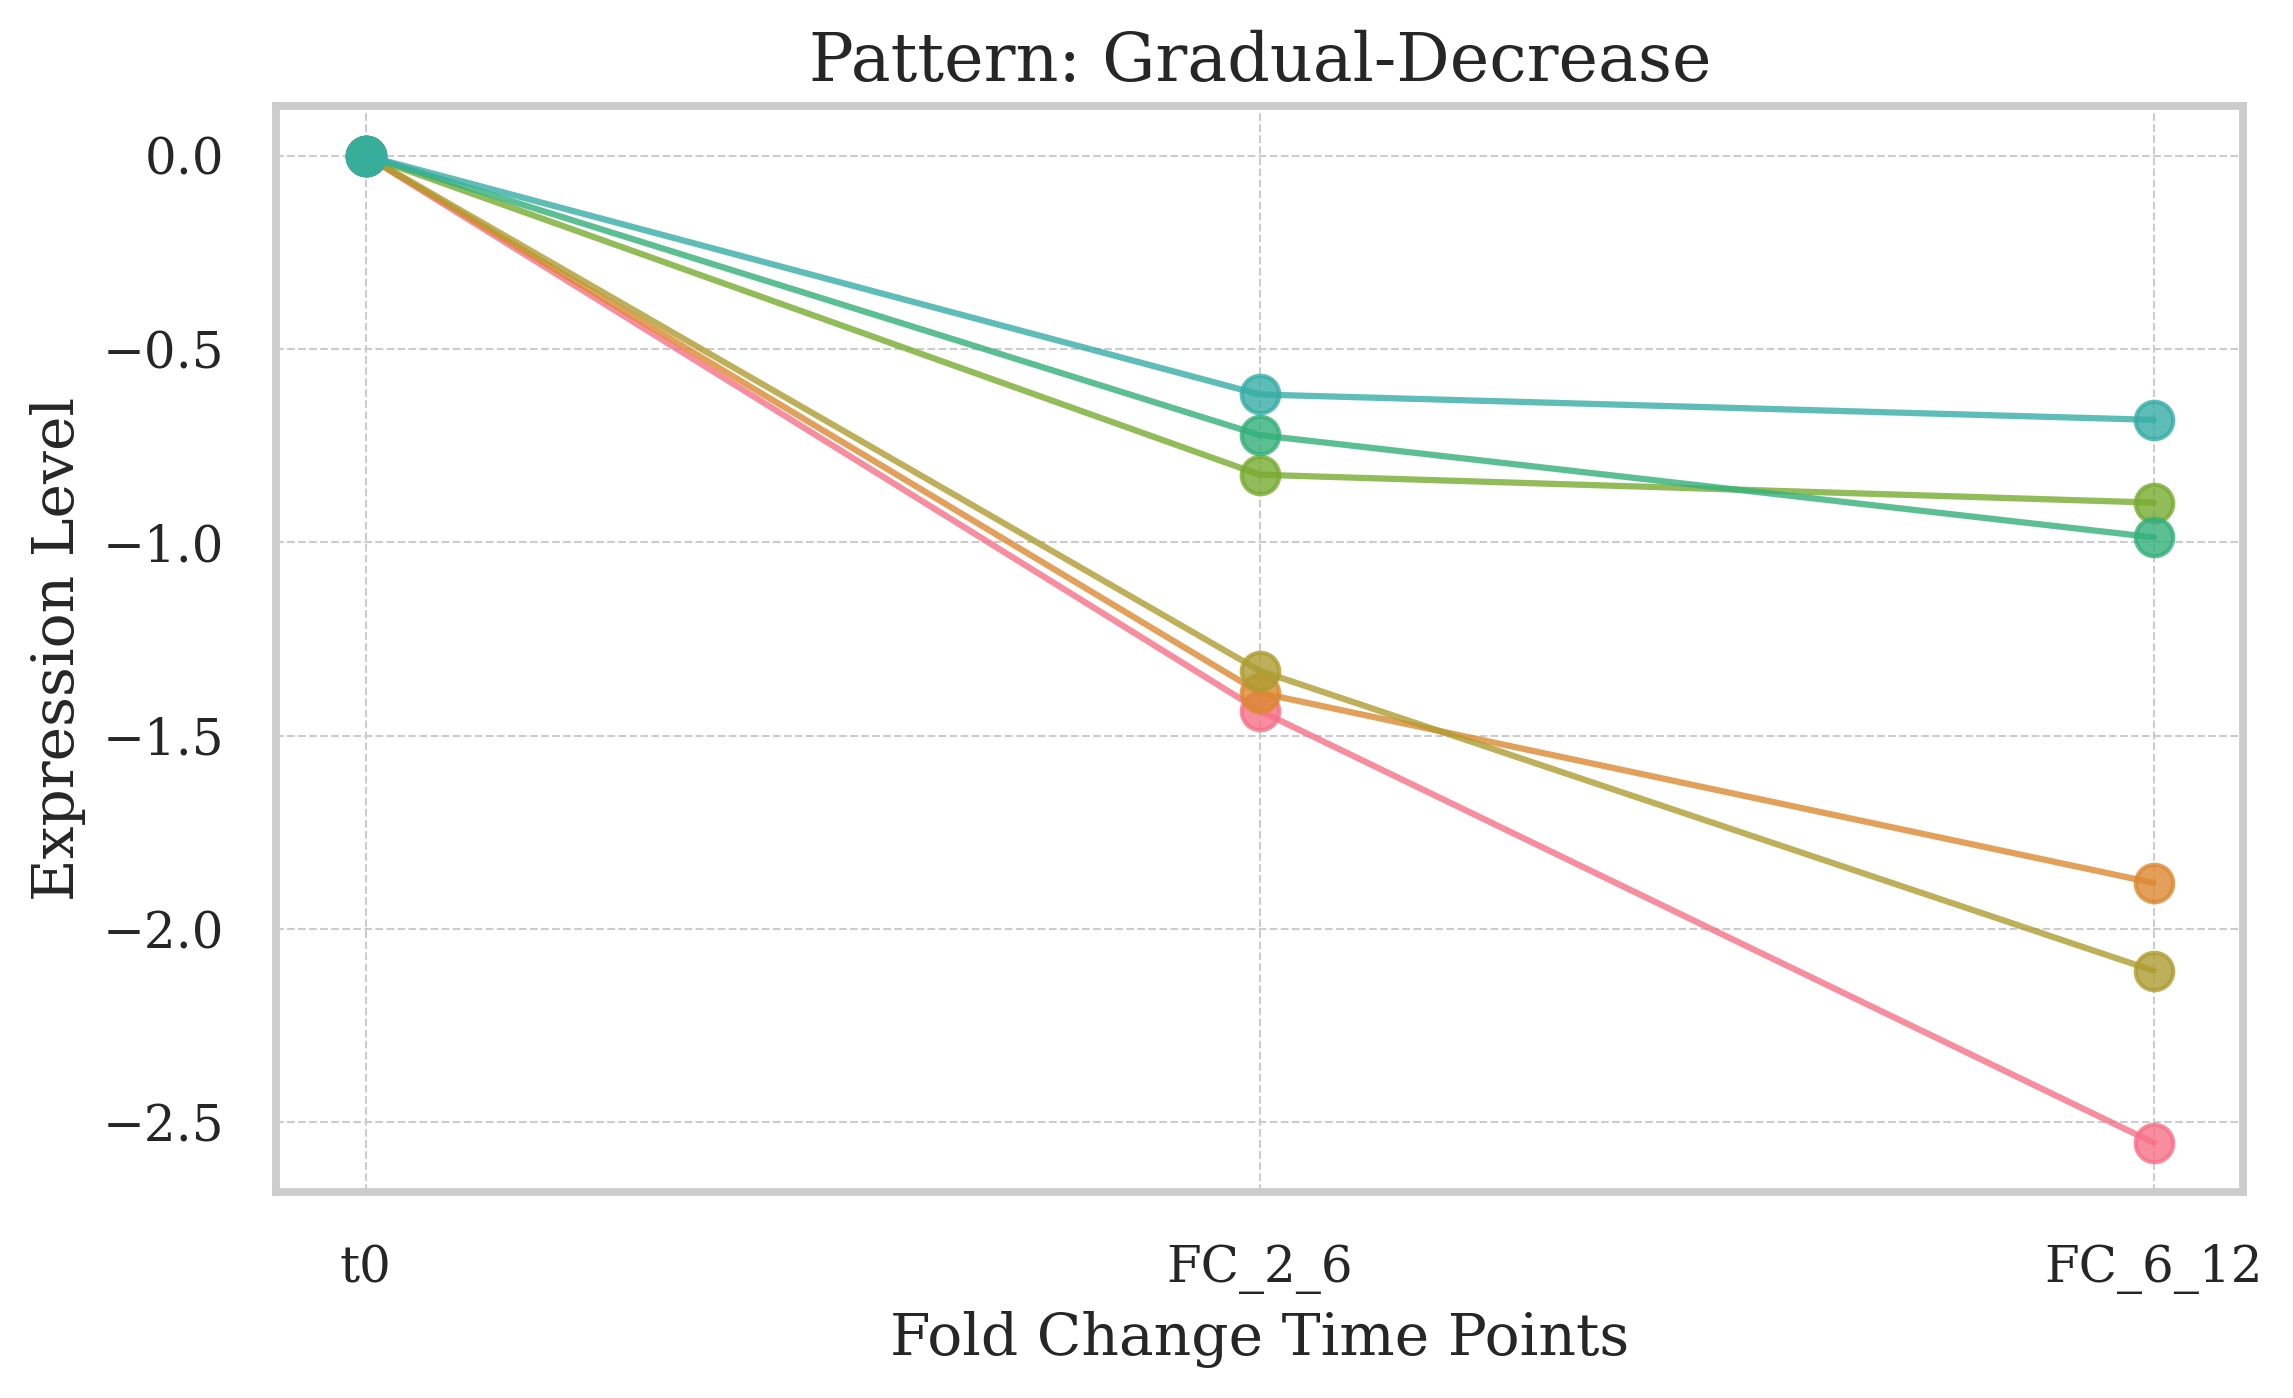

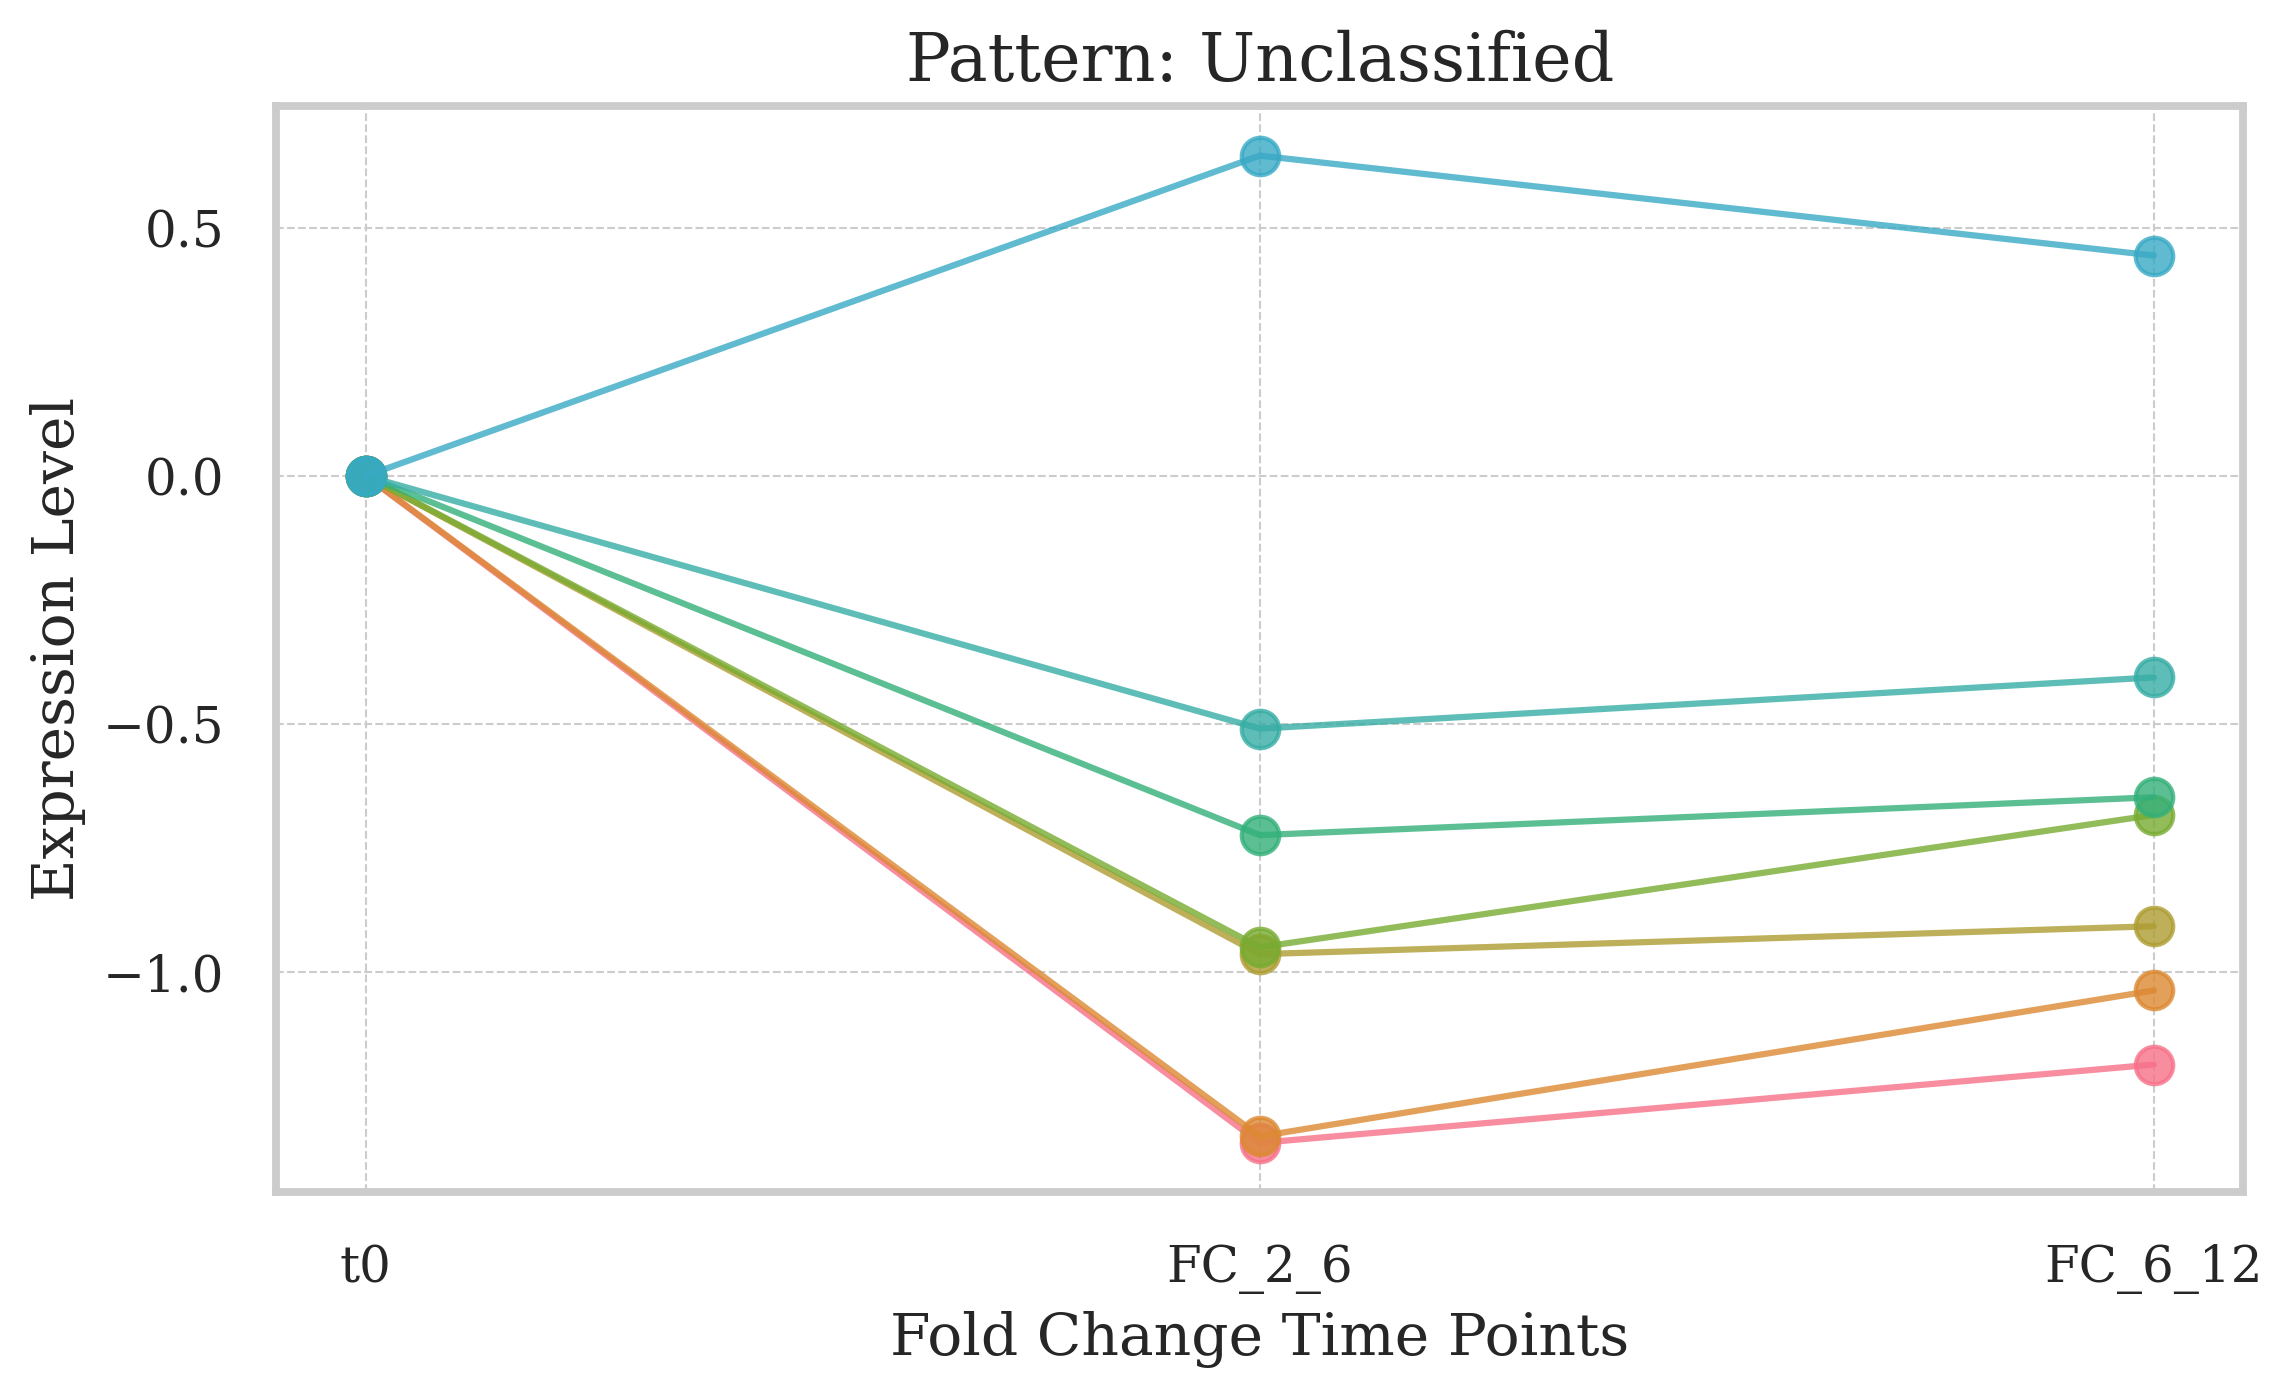

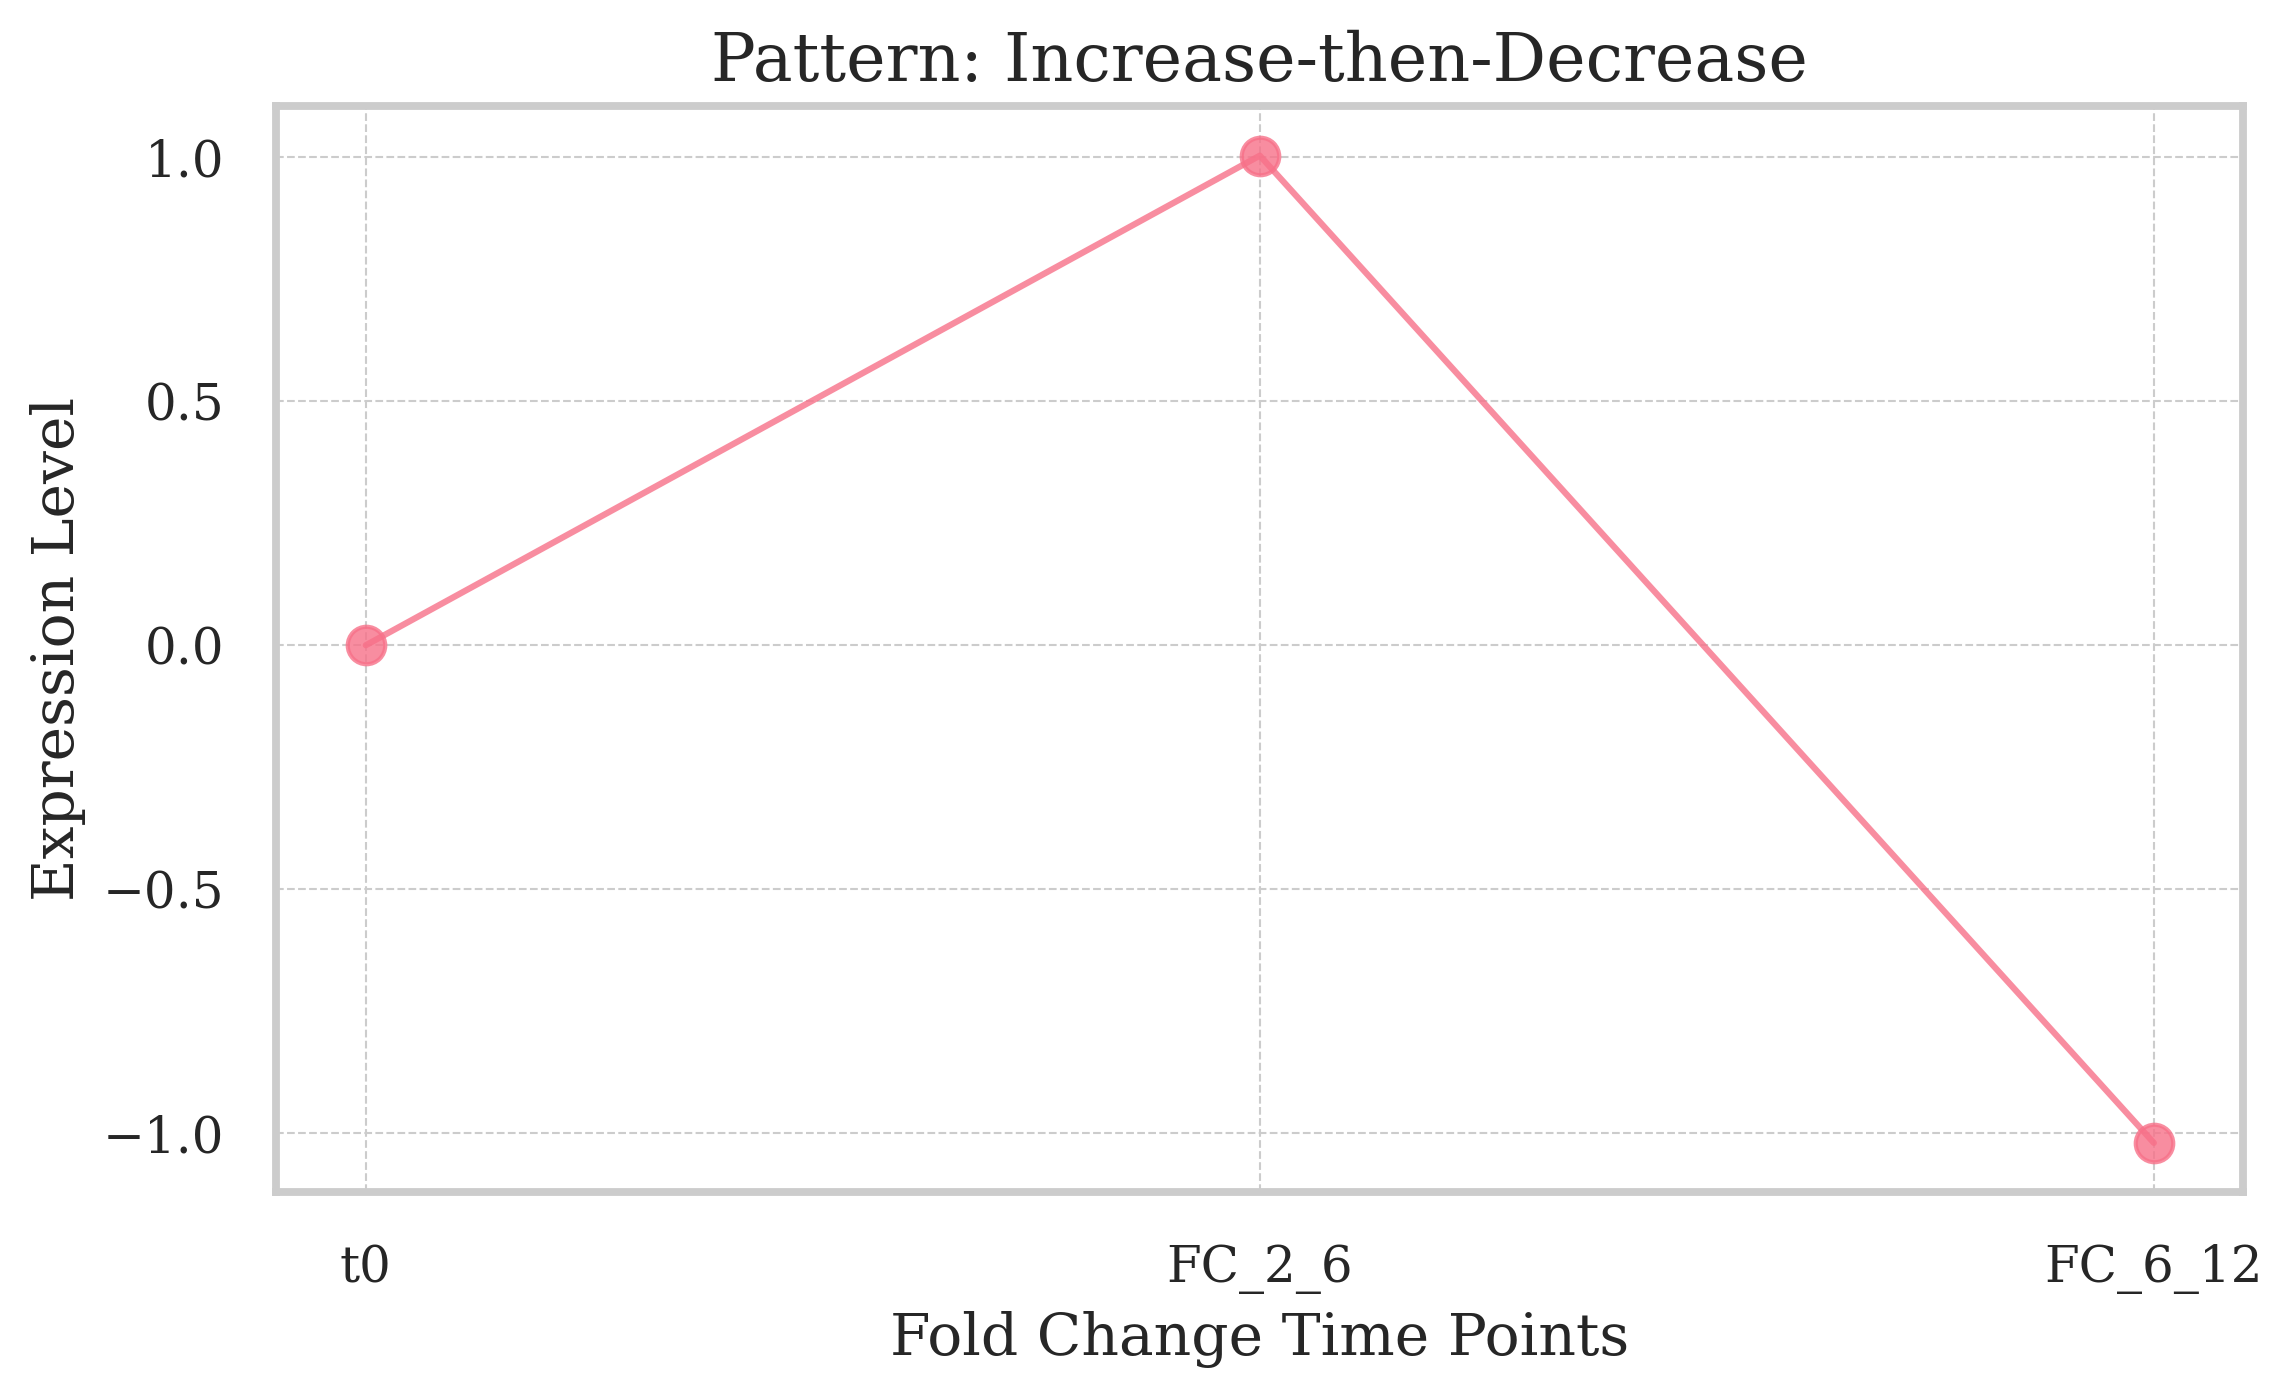

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Use Nature-like plotting styles
sns.set(style='whitegrid', context='talk', palette='Set2')
rcParams['font.family'] = 'serif'
rcParams['figure.dpi'] = 300

# Define color palette
palette = sns.color_palette("husl", n_colors=10)  # Good distinct hues

# compute angle between time points (in degrees)
def compute_angle(delta_expr, delta_time=2.55):
    slope = delta_expr / delta_time
    angle = np.degrees(np.arctan(slope))
    return angle

# Classification function with angles
def classify_pattern(row, angle_thresh=9, steady_thresh=0.6):
    delta1 = row['FC_2_6'] - row['t0']
    delta2 = row['FC_6_12'] - row['FC_2_6']
    
    angle1 = compute_angle(delta1)
    angle2 = compute_angle(delta2)

    if abs(angle1) < steady_thresh and angle2 > angle_thresh:
        return 'Steady-then-Increase'
    elif abs(angle1) < steady_thresh and angle2 < -angle_thresh:
        return 'Steady-then-Decrease'
    elif angle1 > angle_thresh and angle2 < -angle_thresh:
        return 'Increase-then-Decrease'
    elif angle1 < -angle_thresh and angle2 > angle_thresh:
        return 'Decrease-then-Increase'
    elif angle1 > steady_thresh and angle2 > steady_thresh:
        return 'Gradual-Increase'
    elif angle1 < -steady_thresh and angle2 < -steady_thresh:
        return 'Gradual-Decrease'
    else:
        return 'Unclassified'

# Apply classification
data_m['pattern'] = data_m.apply(classify_pattern, axis=1)

# Plot grouped by pattern
timepoints = ['t0', 'FC_2_6', 'FC_6_12']
unique_patterns = data_m['pattern'].unique()

for pattern in unique_patterns:
    subset = data_m[data_m['pattern'] == pattern]
    plt.figure(figsize=(8, 5))

    for i, (_, row) in enumerate(subset.iterrows()):
        color = palette[i % len(palette)]
        plt.plot(timepoints, row[timepoints], marker='o', linewidth=1.5, alpha=0.8, color=color)

    plt.title(f'Pattern: {pattern}', fontsize=16)
    plt.xlabel('Fold Change Time Points', fontsize=14)
    plt.ylabel('Expression Level', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Optional: comment this if too many lines
    # plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize=8)

    plt.show()


In [61]:
# Apply classification
data_m['pattern'] = data_m.apply(classify_pattern, axis=1)

# Create dictionary to store miRNA_IDs by pattern
pattern_groups = {}

for pattern in data_m['pattern'].unique():
    miRNAs = data_m[data_m['pattern'] == pattern]['miRNA_ID'].tolist()
    pattern_groups[pattern] = miRNAs

    # Save each pattern group to a separate file with header
    filename = f"No_FC_{pattern.replace(' ', '_')}.txt"
    with open(filename, 'w') as f:
        f.write(f"{pattern}\n")  # Write pattern name as column header
        for mirna in miRNAs:
            f.write(f"{mirna}\n")


/Users/zainabnazari/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
path2 = Path("/Users/zainabnazari/mfuzz/main")

In [59]:
data_r1 = pd.read_csv(path2/"No_FC_Decrease-then-Increase.txt")

In [60]:
data_r1

,Decrease-then-Increase
0,mmu-miR-10b-5p
1,mmu-miR-666-5p
2,mmu-miR-151-5p


In [62]:
data_r3 = pd.read_csv(path2/"No_FC_Increase-then-Decrease.txt")

In [63]:
data_r3

,Increase-then-Decrease
0,mmu-miR-33-5p


In [65]:
data_r5 = pd.read_csv(path2/"No_FC_Gradual-Decrease.txt")
data_r5

,Gradual-Decrease
0,mmu-miR-1264-3p
1,mmu-miR-448-3p
2,mmu-miR-1298-5p
3,mmu-miR-100-5p
4,mmu-miR-409-5p
5,mmu-miR-204-3p


In [66]:
data_r5 = pd.read_csv(path2/"No_FC_Unclassified.txt")
data_r5

,Unclassified
0,mmu-miR-1298-3p
1,mmu-miR-1264-5p
2,mmu-miR-467a-5p
3,mmu-miR-34c-5p
4,mmu-miR-204-5p
5,mmu-miR-484
6,mmu-miR-434-3p
